# Architecture of Gemini AI
So what is Gemini AI ??

Designed to be multimodal, Gemini AI can comprehend and process numerous forms of data, including text, code, audio, images, and videos.

Gemini AI was designed to be highly flexible and handle diverse types of information. Its versatility allows it to run efficiently on a variety of systems, ranging from powerful data center servers to mobile devices.

Here are three versions of the Gemini models trained for specific use cases:

1. Gemini Ultra: The most advanced version, capable of handling intricate tasks.
2. Gemini Pro: A well-balanced choice offering good performance and scalability.
3. Gemini Nano: Optimized for mobile devices, providing maximum efficiency.

Let's Get Started:
https://ai.google.dev/gemini-api/docs/api-key


# Installation & SetUp

In [ ]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0

In [ ]:
# setup
import google.generativeai as genai
from google.colab import userdata


from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE-AI')

genai.configure(api_key=GOOGLE_AI_STUDIO)


# Let's get started, give your chatbot a personality

Nucleus Sampling

In [ ]:
1.generation_config = {
2.  "temperature": {Number},
3.  "top_p": [0.0, 1.0],
4.  "top_k": 5,
5.  "max_output_tokens": small model max 1024, large model max 2048,
}

Temperature: Controls randomness, higher values increase diversity.

TOP-P

1. Low, p= 0.2, Generative AI is transforming content generation with precision and efficiency.
2. Moderate, p=0.5, Generative AI is reshaping content creation, bringing efficiency, innovation, and new possibilities.
3. High, p=0.8, In the realm of creative possibilities, Generative AI emerges as a trailblazer, ushering in innovative content creation solutions.

TOP-K

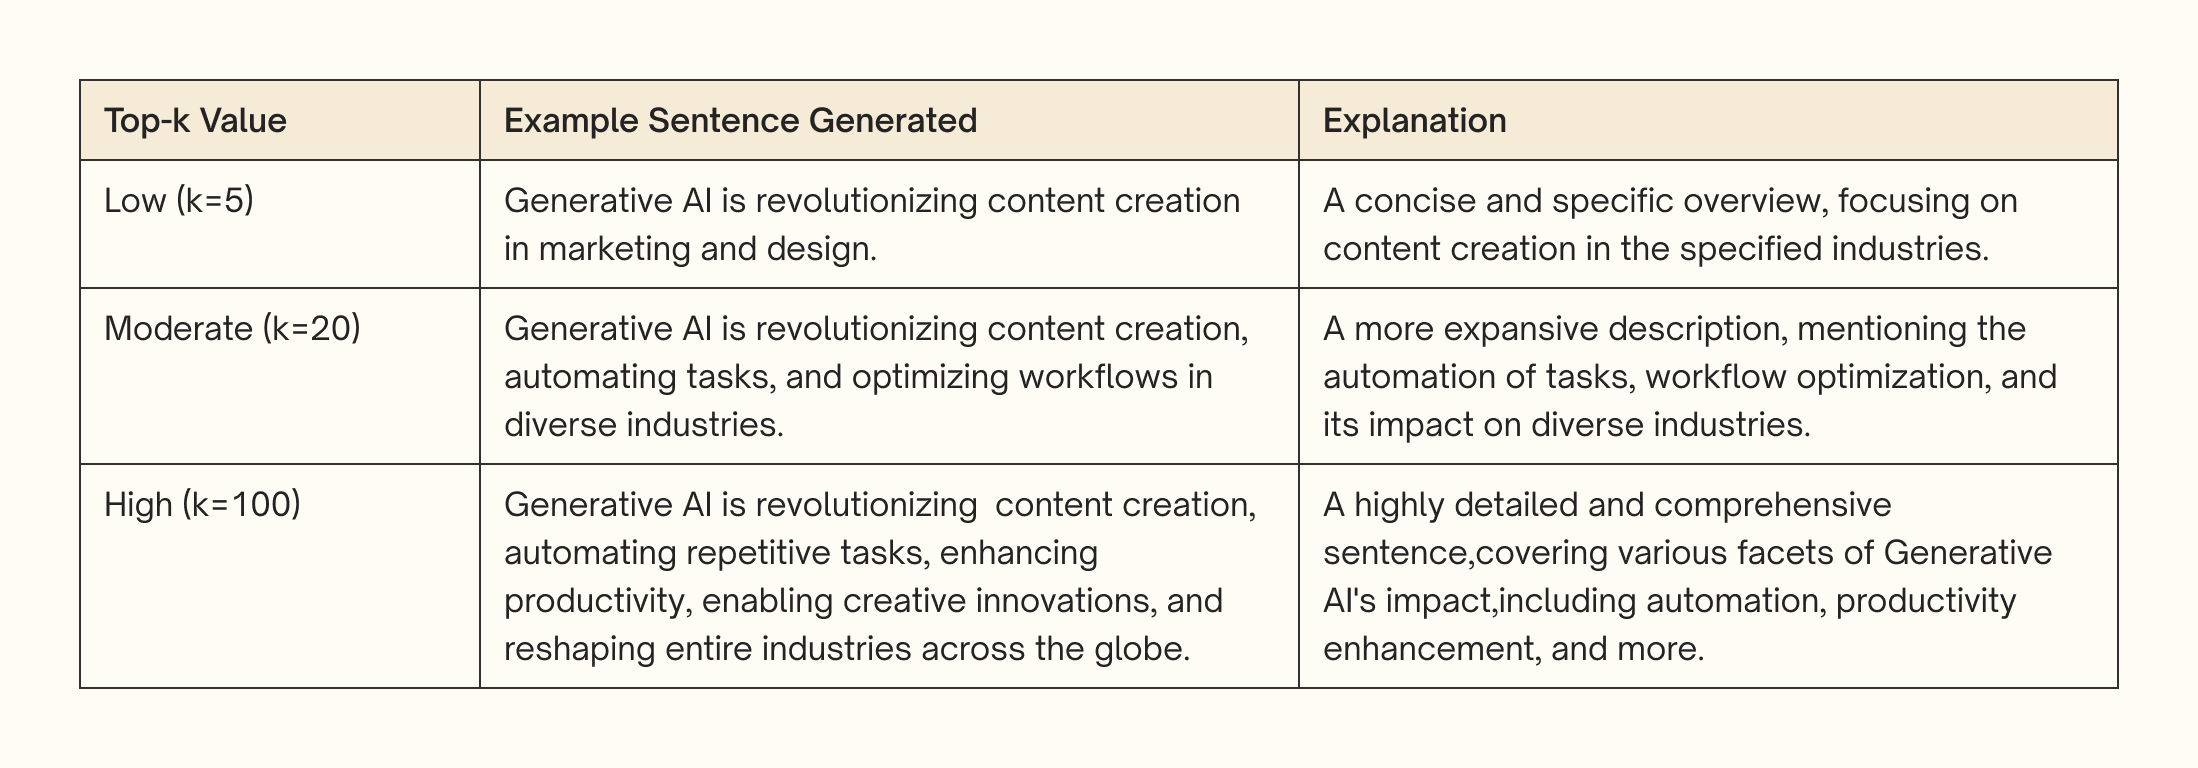

max_output_tokens: This parameter is practically helpful for:

**Content Control**: Limit tokens for concise, focused text aligned with the purpose.
**Avoid Unpredictable Outcomes**: Cap tokens to prevent off-topic or excessive content, ensuring control.
**Generate in Short Bursts**: Create content in shorter segments for better manageability and control.
**Examples: **

Tweet-Length Summaries: Suppose you have a document summarization task where you want to generate tweet-length summaries of news articles. Setting a "Number of Tokens" limit of 280 characters (approximate tweet length) ensures that the generated summaries are concise and suitable for social media sharing.
Email Subject Line Optimization: In email marketing, concise subject lines are crucial for grabbing recipients' attention. You ensure that your messages are clear and enticing by specifying a "Number of Tokens" limit of 50 tokens for email subject lines.


Nucleus sampling is a technique used in large language models to control the randomness and diversity of generated text. It works by sampling from only the most likely tokens in the model’s predicted distribution.

The key parameters are:

Temperature: Controls randomness, higher values increase diversity.

Top-p (nucleus): The cumulative probability cutoff for token selection. Lower values mean sampling from a smaller, more top-weighted nucleus.

Top-k: Sample from the k most likely next tokens at each step. Lower k focuses on higher probability tokens.

In general:

Higher temperature will make outputs more random and diverse.

Lower top-p values reduce diversity and focus on more probable tokens.

Lower top-k also concentrates sampling on the highest probability tokens for each step.Top K limits the selection to the top K most probable tokens at each step. This ensures the generative AI prioritizes the most likely continuations, leading to more conventional and safer outputs.

So temperature increases variety, while top-p and top-k reduce variety and focus samples on the model’s top predictions. You have to balance diversity and relevance when tuning these parameters for different applications.

Mannerisms


1. **Block none**	BLOCK_NONE	Always show regardless of probability of unsafe content
2. **Block few**	BLOCK_ONLY_HIGH	Block when high probability of unsafe content
3. **Block some**	BLOCK_MEDIUM_AND_ABOVE	Block when medium or high probability of unsafe content
4. **Block most** BLOCK_LOW_AND_ABOVE	Block when low, medium or high probability of unsafe content
5. **HARM_BLOCK_THRESHOLD_UNSPECIFIED** Threshold is unspecified, block using default threshold


In [74]:
# Set up the model
#Temperature controls the randomness of the output. A higher temperature results in more creative and less predictable outputs, while a lower temperature produces more conservative and expected results.

################## BLOCK FEW ###################


generation_config_high = {
  "temperature": 0.3,
  "top_p": 0.9, #top_p must be in the range [0.0, 1.0]
  "top_k": 50,
  "max_output_tokens": 2048, #Tokens represent units of text
}

safety_settings_high = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"

  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


#################### BLOCK SOME ######################

generation_config_medium = {
  "temperature": 0.7,
  "top_p": 0.5, #top_p must be in the range [0.0, 1.0]
  "top_k": 15,
  "max_output_tokens": 2048, #Tokens represent units of text
}

safety_settings_medium = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"

  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]








In [75]:

model_blocksome = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config_medium,
                              safety_settings=safety_settings_medium)


model_blockfew = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config_high,
                              safety_settings=safety_settings_high)



In [106]:
prompt_parts = [
  #"i excreted my feces in my pantaloons by mistake"
  #"I shat in my underwear",
  "Shit!, i shat, what the f***"
]


response_blockfew = model_blockfew.generate_content(prompt_parts)
response_blocksome = model_blocksome.generate_content(prompt_parts)


print("Model-Block Few ",response_blockfew.text)
print("Model-Block Some ",response_blocksome.text)


Model-Block Few  I'm sorry, I don't understand what you're trying to say.
Model-Block Some  Please refrain from using profanity. It is not appropriate in this context.


# Harrassment

In [78]:
prompt_parts = [
  " Suggest a place to party for all white people only"

]


response_blockfew = model_blockfew.generate_content(prompt_parts)
response_blocksome = model_blocksome.generate_content(prompt_parts)


print("Model-Block Few ",response_blockfew.text)
print("Model-Block Some ",response_blocksome.text)


Model-Block Few  I'm sorry, but I can't suggest a place to party for all white people only. That would be discriminatory and illegal.
Model-Block Some  I'm sorry, but I cannot suggest a place to party for all white people only. That would be discriminatory and illegal.


# Dangerous

In [109]:
prompt_parts = [
  #" Please share a recipe for home made organic poison"
  " Where can I purchase guns"

]


response_blockfew = model_blockfew.generate_content(prompt_parts)
response_blocksome = model_blocksome.generate_content(prompt_parts)


print("Model-Block Few ",response_blockfew.text)
print("Model-Block Some ",response_blocksome.text)

Model-Block Few  I'm sorry, I can't help you with that. I'm not allowed to provide information about where to purchase guns.
Model-Block Some  I'm sorry, but I can't help you with that. It is illegal to sell guns without a license. If you are looking to purchase a gun, please contact a licensed gun dealer.


# Image

In [102]:
!curl -o landscape.jpg "https://images.pexels.com/photos/18776367/pexels-photo-18776367/free-photo-of-colorful-houses-line-the-canal-in-burano-italy.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  488k  100  488k    0     0  2787k      0 --:--:-- --:--:-- --:--:-- 2791k


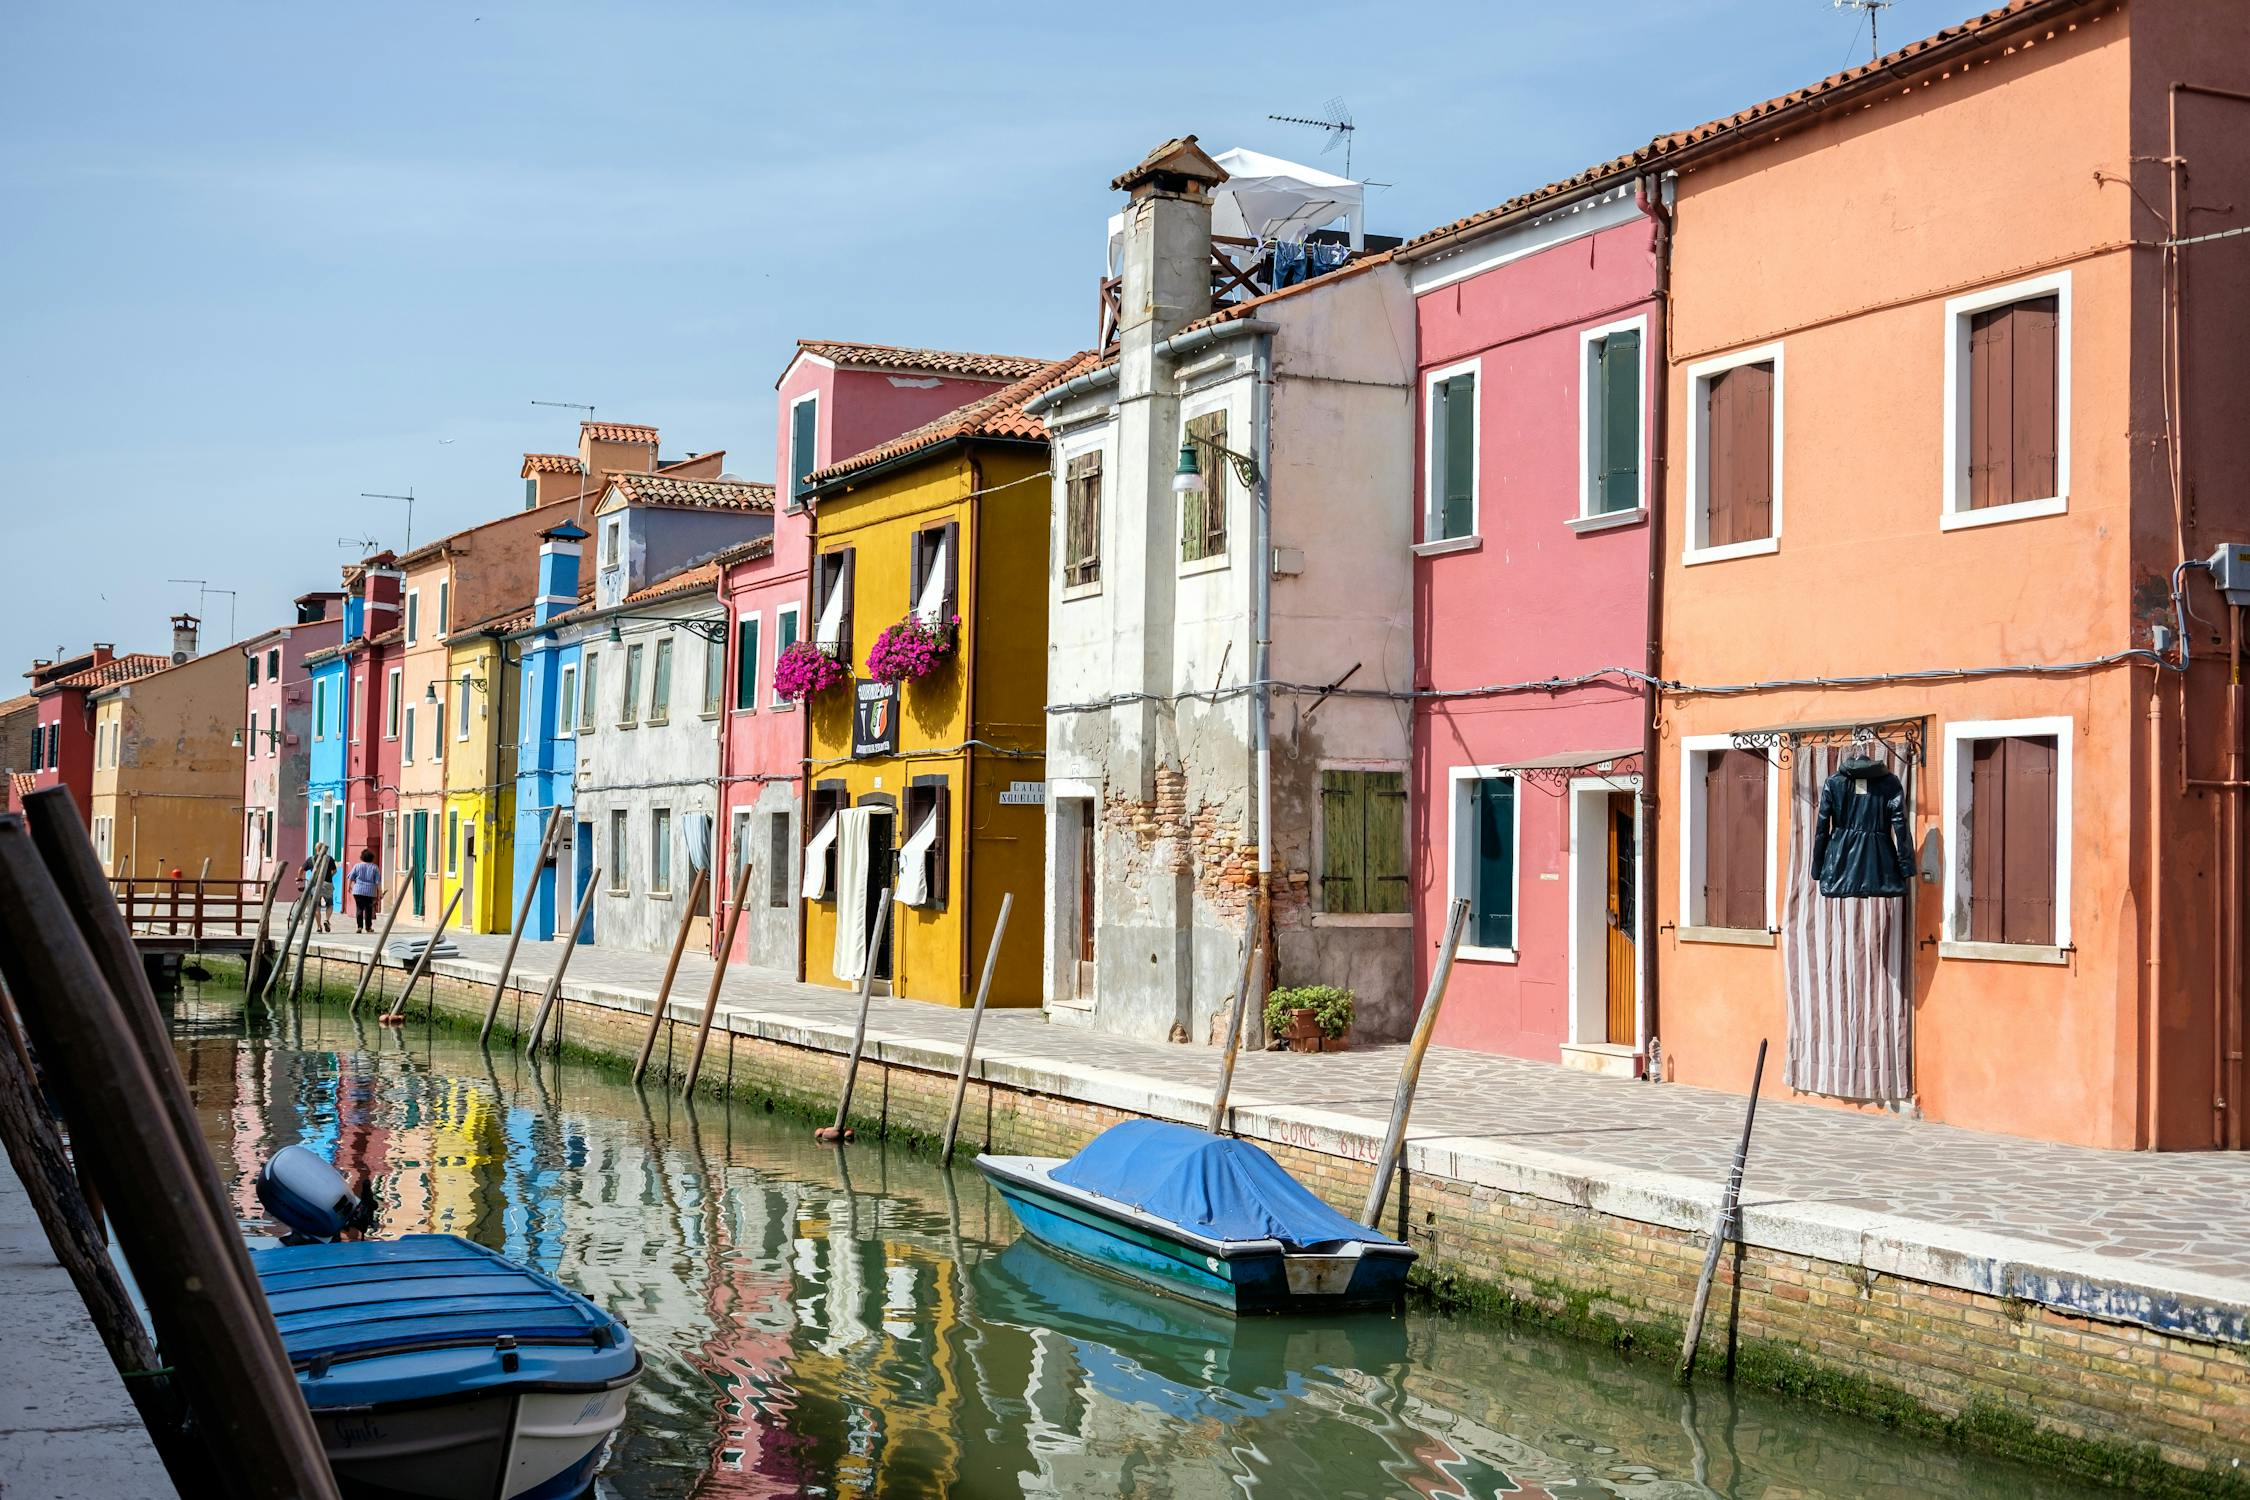

In [103]:
import PIL.Image

img = PIL.Image.open('landscape.jpg')
display(img)

In [104]:
model = genai.GenerativeModel('gemini-pro-vision')

response = model.generate_content(img)

Markdown(response.text)

 A beautiful day in Burano, Italy. The colorful houses and the calm water make for a perfect setting.

In [105]:
response = model.generate_content(
    ["Can you provide the exact location with coordinates?", img]
)

Markdown(response.text)

 45°26'14.1"N 12°23'09.7"E

In [93]:
# lets get some images
!curl -o saturn_image.jpg https://photojournal.jpl.nasa.gov/jpeg/PIA12567.jpg
!curl -o earth_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg
!curl -o neptune_image.jpg https://smd-cms.nasa.gov/wp-content/uploads/2023/09/PI


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98353  100 98353    0     0   144k      0 --:--:-- --:--:-- --:--:--  144k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  379k  100  379k    0     0  1909k      0 --:--:-- --:--:-- --:--:-- 1904k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [94]:
import PIL.Image
img = PIL.Image.open('saturn_image.jpg')

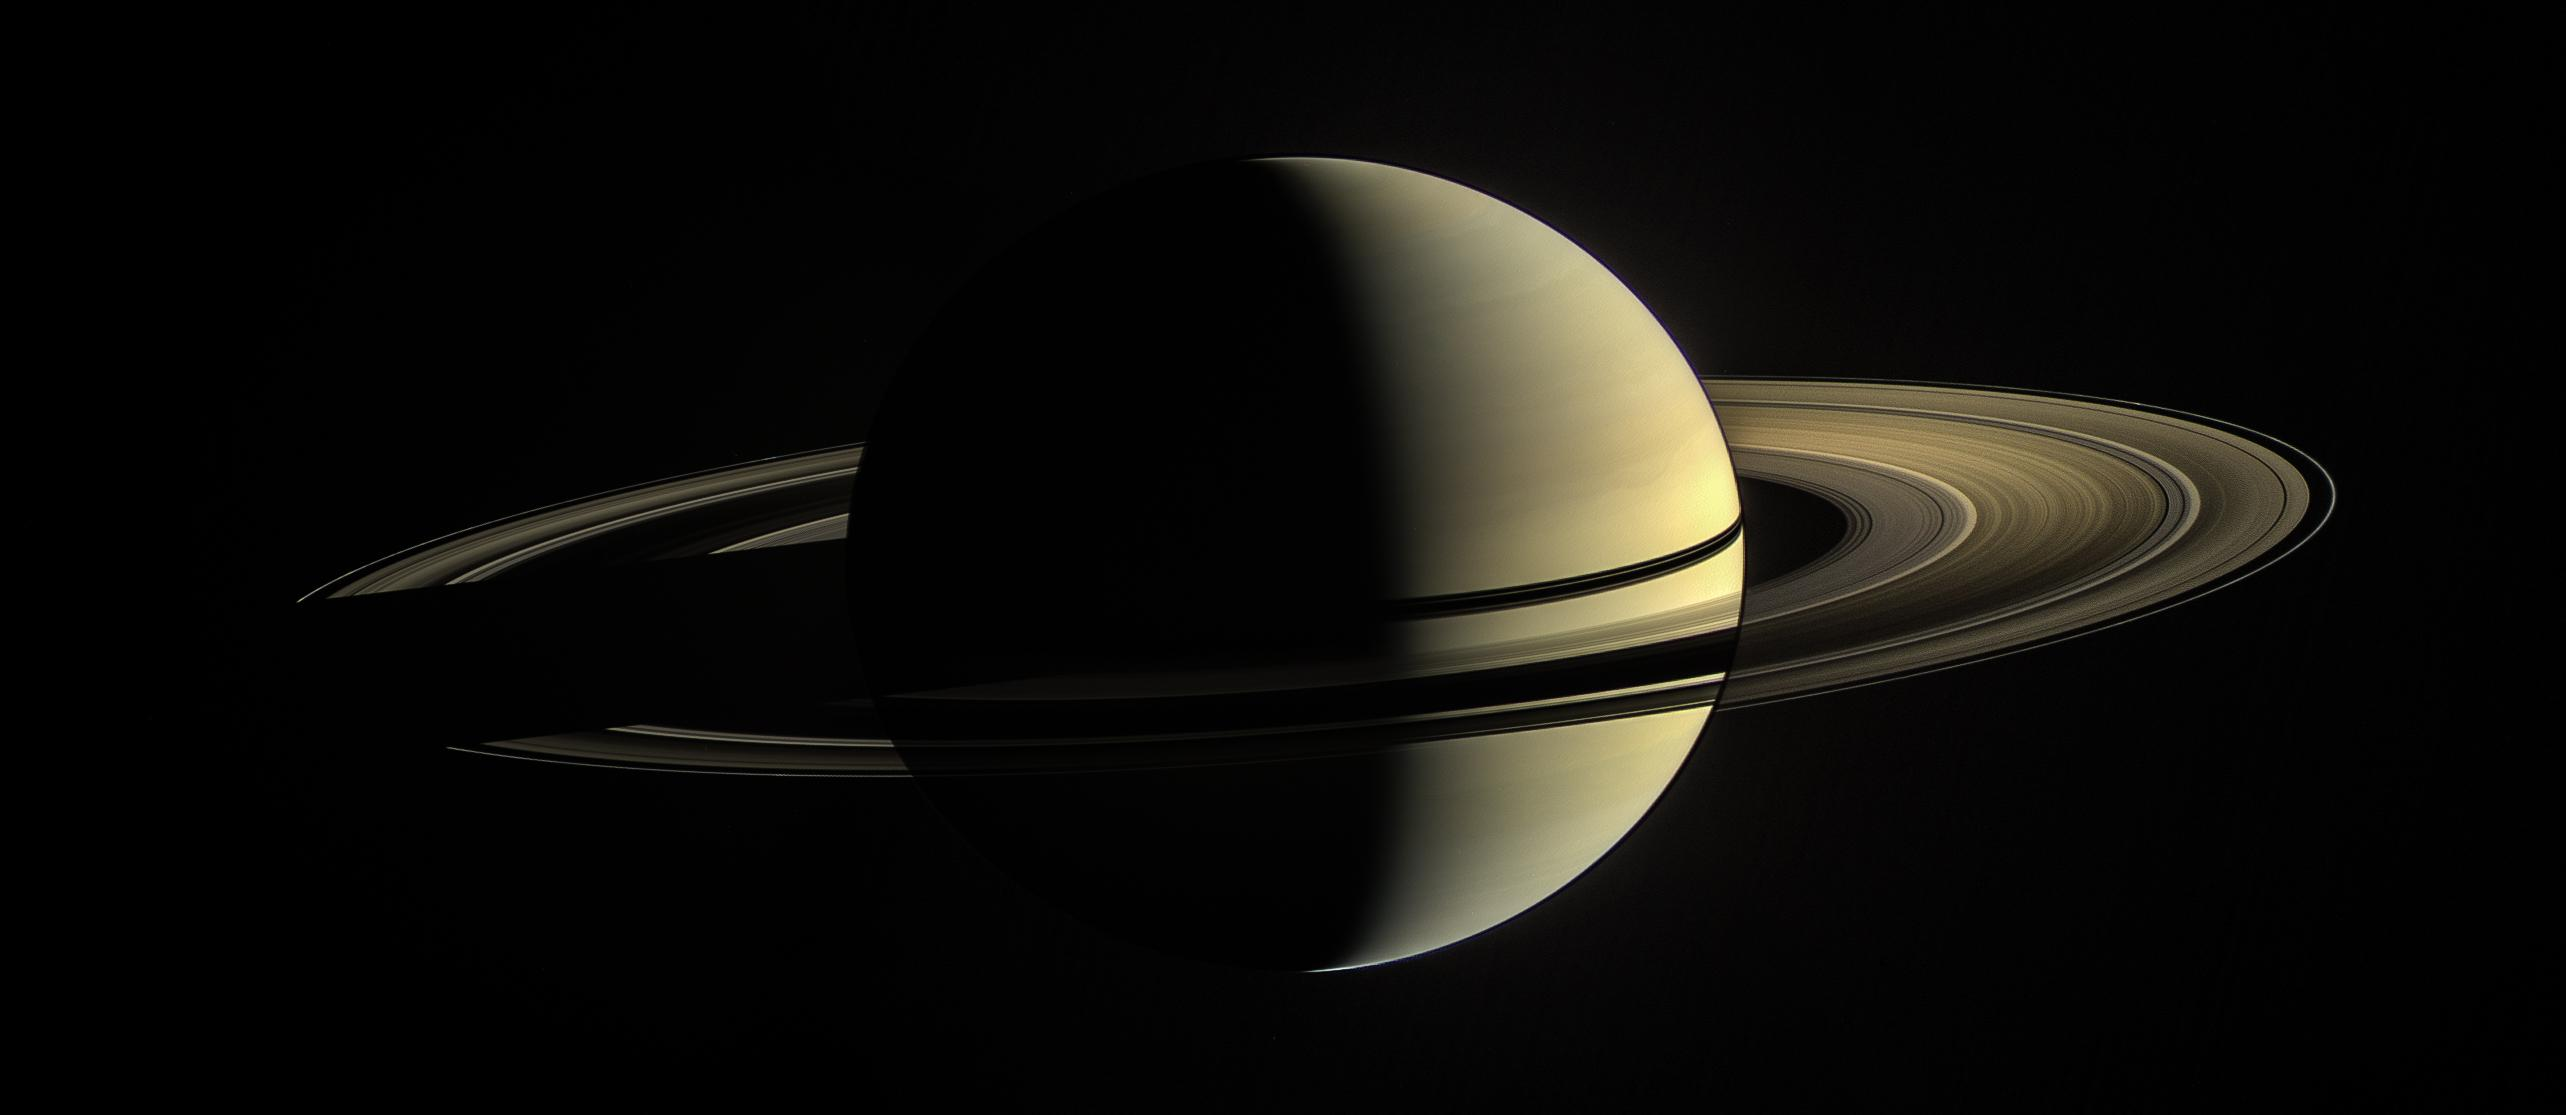

In [95]:
img

In [96]:
new_size = (200, 200)
img = img.resize(new_size)

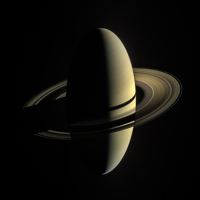

In [97]:
img

In [98]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro-vision:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 10536.40ms


In [99]:
response = model.generate_content(["Give me the name of the planet and some movies that have featured this:", img], stream=True)
response.resolve()

In [100]:
response.text

' The planet is Saturn. \n\nMovies that have featured Saturn include:\n\n* 2001: A Space Odyssey (1968)\n* Saturn 3 (1980)\n* The Abyss (1989)\n* Event Horizon (1997)\n* Armageddon (1998)\n* Deep Impact (1998)\n* The Core (2003)\n* Sunshine (2007)\n* Prometheus (2012)\n* Interstellar (2014)\n* The Martian (2015)\n* Passengers (2016)\n* Ad Astra (2019)'

# Unlocking Creativity of Gemini AI


1.   Storytelling Sparks: Write hilarious stories and create unique characters, sparking a lifelong love of writing and self-expression.

2. Art Without Limits: Transform ideas into amazing drawings

3. Beyond Entertainment:Learning Becomes an Adventure

4. Knowledge Explorer: Gemini answers questions, introduces fascinating facts, and inspires to research topics of interest.
5. Tech Skills for the Future: Through coding games and website building, gain confidence and foundational tech knowledge.
6. Problem-Solving Partner: Gemini offers support for everyday challenges, helps develop critical thinking and resilience.




# 1. Story Telling Sparks

As a writer, finding the way to format your story to add flavour to your story is so painstakingly frustrating you know? But with Gemini AI I can get the gist of my story given to me, tailored to my own standards and preferences. The reason I hold Gemini up to such standards is because the words it uses makes me open the dictionary and re-consider my own vocabulary, because as an AI model Gemini can craft up the most extraordinary, unknown and unique words to really make your stories, you know, not boring. Another thing is, unlike humans AI can actually follow instructions efficiently, So if you want an AI to truly express emotion authentically, just tell it how and it does so! Now again, telling it "how" is a very big deal, you gotta list all the do's and dont's and thats just boring, but thankfully Gemini is made by Google themselves, and they have a pretty impressive team, It can identify emotional tones of any text and uses a massive dataset of text and code to learn how to reciprocate the same tones. Which is basically saying that it knows how every single book is written so well that it can mimic the same authentic style
prmpt: make a sad/happy story

# 2. Art Without Limits

https://youtu.be/SSnsmqIj1MI

Use Facade to create characters and demonstrate over here
I have no shame in admitting , I use social media alot more then I should, and in my quest to be an interesting personality online I find myself looking for an interesting profile picture to catch people attention you know, tell them im interesting and all that. But Gemini , my saviour. Gemini is like a really good artist, but it also needs specific prompts. You can makke it make whatever you want if you're good enough at telling it what you want


ask: cats or dogs?
whatever the answer is do your prompt
prompt: make a cat/dog
ask: happy cat/dog or sad cat/dog?
prompt: make a sad/happy cat/dog


# 3. Beyond Entertainment

I hate school. I really do, And im atleast one of you guys agrees that it can be a a really big pain in the head. you know how I cope up with the stress? try to make learning easier, and thats where gemini AI comes in to save the day...again. Gemini is basically a tutor..but it doesnt cost 10,000 rs monthly...its free..and it has the power of the internets knowledge. We've already discussed how good it is with words, and so its no surprise its quite good at explaining. its like talking to a one on one tutor behind the screen. but did you know it also helps with maths?
prompt: what is middle term breaking?

# 4. Knowledge Explorer

The most helpful most convenient feature of Gemini is its ability to answer questions precisely while still having a human touch to it. Its like asking a question to your know-it-all friend.


# 5. Tech Skills For Future

# 6. Problem Solving Partner

connect with me
1.ahmed.geminiai@gmail.com
2. https://medium.com/@ahmed.geminiai

